<a href="https://colab.research.google.com/github/luida-M/Proyecto-AKI/blob/main/ProyectoDS_Parte1_Medina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ventas Totales en Supermercados de la Argentina del 2023**

Ventas totales en supermercados a
valores corrientes y constantes y evolución por canal de venta, medio de pago y grupos de artículos.
Datos obtenidos de datos.gob.ar

**Hipotesis:** Se espera que el consumo total de los usuarios argentinos esté influenciado significativamente por los medios de pago utilizados, las ventas afectadas por la inflación y los comportamientos de compra.

**Obejtivos:**
* Conocer el consumo de los usuarios en los supermercados.
* Identificar los medios de pago utilizados.
* Analizar las ventas por inflación.
* Estudiar el comportamiento de las formas de comprar.

In [16]:
#Montar tu Google Drive en tu entorno de Google Colab
from google.colab import drive
drive.mount('/content/drive')

# Clonar el repositorio de GitHub
!git clone https://github.com/luida-M/ProyectoVisualizaci-n_COLAB.git

# Navega al directorio del repositorio
import os
os.chdir('ProyectoVisualizaci-n_COLAB')

#Importa librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lee el dataset  csv y lo carga en un DataFrame de pandas
df = pd.read_csv('ventas-totales-supermercados-2.csv', sep=',')

# Se han eliminado las columnas que causaban el error: 'otrossalon_ventas', 'alcohol', 'quality'
print(df[['indice_tiempo','ventas_precios_corrientes',
       'ventas_precios_constantes', 'ventas_totales_canal_venta',
       'salon_ventas', 'canales_on_line', 'ventas_totales_medio_pago',
       'efectivo', 'tarjetas_debito', 'tarjetas_credito', 'otros_medios',
       'ventas_totales_grupo_articulos', 'subtotal_ventas_alimentos_bebidas',
       'bebidas', 'almacen', 'panaderia', 'lacteos', 'carnes',
       'verduleria_fruteria', 'alimentos_preparados_rotiseria',
       'articulos_limpieza_perfumeria', 'indumentaria_calzado_textiles_hogar',
       'electronicos_articulos_hogar', 'otros']].head(6))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cloning into 'ProyectoVisualizaci-n_COLAB'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 25 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 278.00 KiB | 3.97 MiB/s, done.
Resolving deltas: 100% (6/6), done.
  indice_tiempo  ventas_precios_corrientes  ventas_precios_constantes  \
0    2017-01-01               27858.872083               27477.307666   
1    2017-02-01               25994.200168               25223.428860   
2    2017-03-01               27780.006522               26334.263640   
3    2017-04-01               29134.272221               27045.884463   
4    2017-05-01               27969.004677               25631.863992   

   ventas_totales_canal_venta  salon_ventas  canales_on_line  \
0                

**Muestra las Ventas Precios Constantes y Mes**

Diagnóstico:  

* 1. Banda de Variabilidad (Azul Claro): Muestra la variabilidad o el rango de confianza alrededor de las ventas mensuales.

* 2. Banda de Tendencia (Roja Claro): La banda roja clara alrededor de la línea de tendencia roja muestra el rango de confianza de la tendencia.

* 3. Línea de Ventas Mensuales (Azul): Representa las ventas constantes ajustadas por la inflación para cada mes del año, reflejando un cambio en las ventas mes a mes.

* 4.	Línea de Tendencia General (Roja): Muestra la tendencia general que suaviza las fluctuaciones mensuales y muestra una inclinación ascendente, lo que sugiere que, a pesar de las fluctuaciones mensuales, hay un incremento general en las ventas a lo largo del año debido al cambio de gobierno por lo que el usuario comenzó a realizar compras para protegerse de la subida de precios.

Las Ventas Precios Constantes se refiere a las variaciones de los precios en funciòn del volumen de ventas y no en terminos monetarios.

Index(['indice_tiempo', 'ventas_precios_corrientes',
       'ventas_precios_constantes', 'ventas_totales_canal_venta',
       'salon_ventas', 'canales_on_line', 'ventas_totales_medio_pago',
       'efectivo', 'tarjetas_debito', 'tarjetas_credito', 'otros_medios',
       'ventas_totales_grupo_articulos', 'subtotal_ventas_alimentos_bebidas',
       'bebidas', 'almacen', 'panaderia', 'lacteos', 'carnes',
       'verduleria_fruteria', 'alimentos_preparados_rotiseria',
       'articulos_limpieza_perfumeria', 'indumentaria_calzado_textiles_hogar',
       'electronicos_articulos_hogar', 'otros', 'Mes'],
      dtype='object')


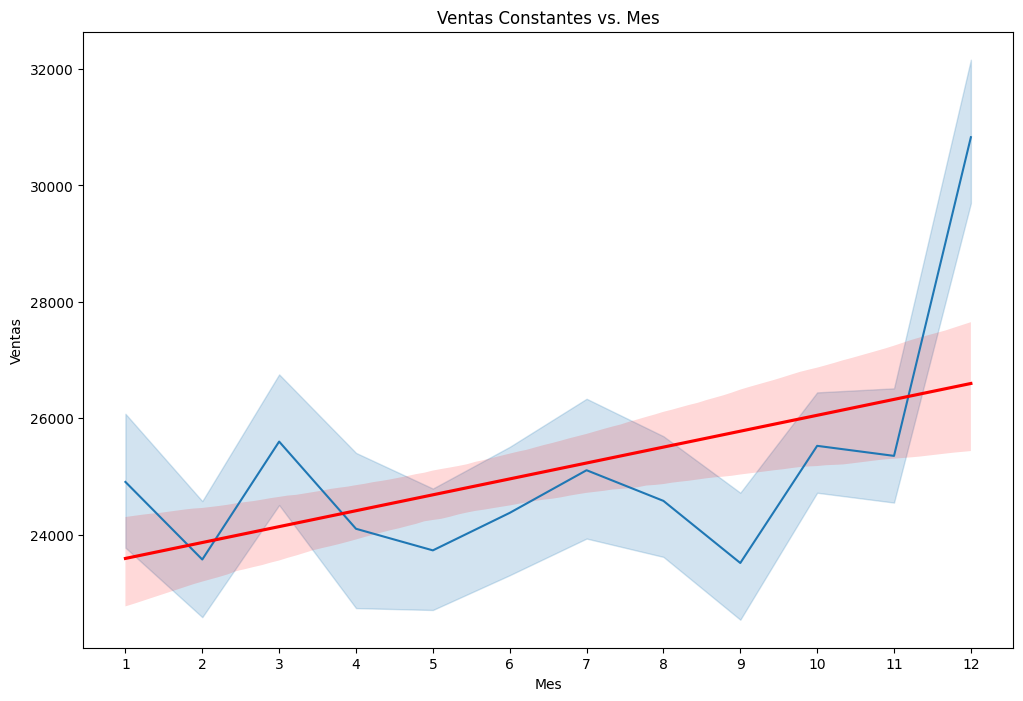

In [ ]:
# creando una nueva columna llamada 'Mes' en tu DataFrame extrayendo información de la columna "indice_tiempo"
df['Mes'] = df['indice_tiempo'].str[5:7].astype(int)

# Verificar la existencia de la columna 'ventas_precios_constantes' existe
print(df.columns)

# Verifica si el nombre de la columna es correcto o existe y errores tipográficos sino los ajusta

# Si la columna es ligeramente distinto lo ajusta
y_column = 'ventas_precios_constantes'  # or the actual correct column name
if y_column not in df.columns:

    # Imprime una advertencia sino encuentra la columna
    print(f"Warning: Column '{y_column}' not found in the DataFrame.")

    # Sugiere los nombres de columnas similares
    import difflib
    similar_columns = difflib.get_close_matches(y_column, df.columns, n=3, cutoff=0.6)
    print(f"Did you mean one of these columns? {similar_columns}")

#Define el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crea un gráfico de línea utilizando la librería Seabom
sns.lineplot(data=df, x='Mes', y=y_column)

# Línea de tendencia en color rojo
sns.regplot(data=df, x='Mes', y=y_column, scatter=False, color='red', ax=plt.gca())

# Recuerda que el nombre de la columna es correcto
plt.title('Ventas Constantes vs. Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas')

#Muestra las etiquetas para todos los meses
plt.xticks(range(1, 13))
plt.show()


**Este Gráfico de Barra Muestra las Ventas, Medio de Pago y Grupo de Artículos**

Diagnóstico: Se muestra el medio de pago utilizado por los usuarios para realizar sus compras, en este caso, con tarjetas de crédito.


df existe en el ámbito global
0    efectivo
1    efectivo
2    efectivo
3    efectivo
4    efectivo
Name: medio_de_pago, dtype: object
   ID  ventas_totales_canal_venta medio_de_pago grupo_de_articulos  \
0   0                2.785887e+07      efectivo            bebidas   
1   1                2.599420e+07      efectivo            bebidas   
2   2                2.778001e+07      efectivo            bebidas   
3   3                2.913427e+07      efectivo            bebidas   
4   4                2.796900e+07      efectivo            bebidas   

         ventas  
0  3.514467e+06  
1  3.344457e+06  
2  3.290739e+06  
3  3.253288e+06  
4  2.869437e+06  


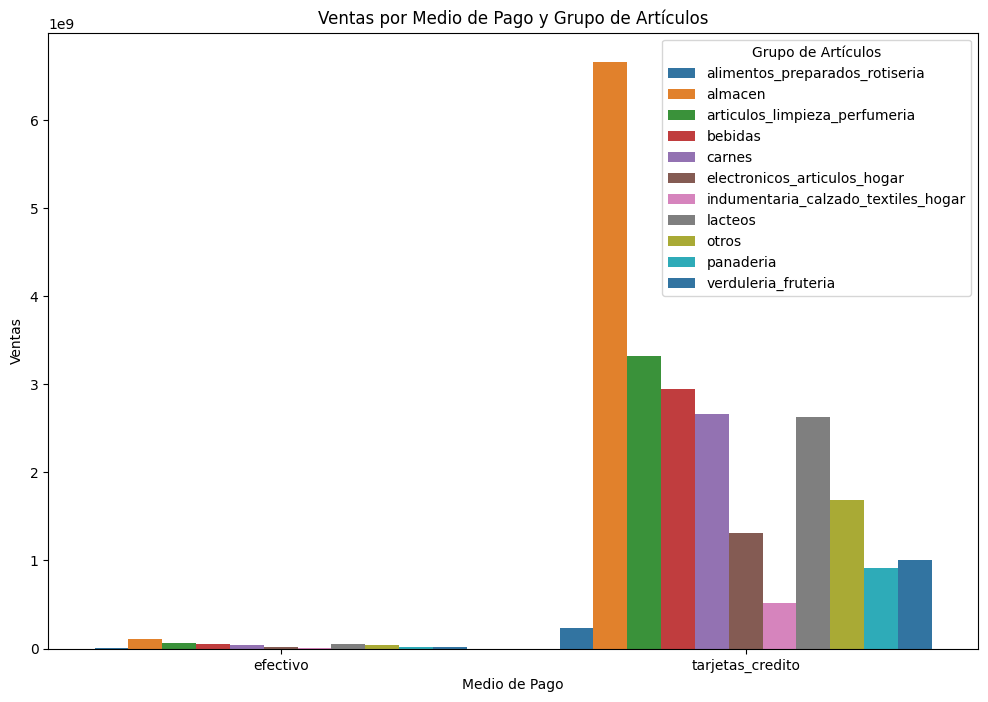

In [ ]:
# Verifica si df existe en el ámbito global
try:
    if 'df' in globals():
        print("df existe en el ámbito global")
    else:
        print("df no existe en el ámbito global")

        # Cargar el dataframe si no existe
        # df = pd.read_csv("tu_archivo.csv")
        # Reemplaza el archivo
except NameError:
    print("df no está definido")

# Crea una nueva columna para el medio de pago
df['medio_de_pago'] = df[['efectivo', 'tarjetas_debito', 'tarjetas_credito', 'otros_medios']].idxmax(axis=1)

# Verifica los cambios
print(df['medio_de_pago'].head())

df['ID'] = df.index
df_pivotado = pd.melt(df,
                      id_vars=['ID', 'ventas_totales_canal_venta', 'medio_de_pago'],
                      value_vars=['bebidas', 'almacen', 'panaderia',
                                  'lacteos', 'carnes', 'verduleria_fruteria',
                                  'alimentos_preparados_rotiseria', 'articulos_limpieza_perfumeria',
                                  'indumentaria_calzado_textiles_hogar', 'electronicos_articulos_hogar', 'otros'],
                      var_name='grupo_de_articulos',
                      value_name='ventas')

# Verifica el dataframe pivotado
print(df_pivotado.head())


# Agrupa los datos por medio de pago y grupo de artículos y sumar las ventas
df_agrupado = df_pivotado.groupby(['medio_de_pago', 'grupo_de_articulos']).sum().reset_index()

# Crea el gráfico de barras apiladas
plt.figure(figsize=(12, 8))
sns.barplot(data=df_agrupado, x='medio_de_pago', y='ventas', hue='grupo_de_articulos', palette='tab10')
plt.title('Ventas por Medio de Pago y Grupo de Artículos')
plt.xlabel('Medio de Pago')
plt.ylabel('Ventas')
plt.legend(title='Grupo de Artículos')
plt.show()



**Este Gráfico de Torta muestra las ventas en porcentaje por Salón Ventas y Canales Online**

Diagnóstico: Muestra la distribución de las 2 categorías. Las compras fueron realizadas en el local del supermercado

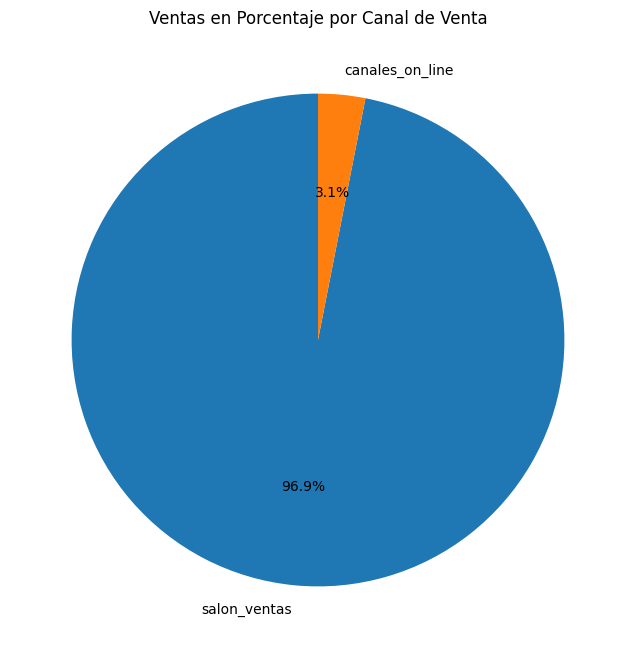

In [ ]:
# Calcula las ventas totales para cada canal
ventas_totales = df[['salon_ventas', 'canales_on_line']].sum()

# Crea el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(ventas_totales, labels=ventas_totales.index, autopct='%1.1f%%', startangle=90)
plt.title('Ventas en Porcentaje por Canal de Venta')
plt.show()

**Identifica valores perdidos en el dataset:**

In [ ]:
# Identifica valores perdidos
missing_values = df.isnull().sum()
print("Valores perdidos por columna:\n", missing_values)

# Elimina filas con valores perdidos
df_cleaned = df.dropna()

import numpy as np

# Imputa valores perdidos con la media de la columna, solo para columnas numéricas
numeric_cols = df.select_dtypes(include=np.number).columns
df_imputed = df.copy()

# Crea una copia para evitar modificar el DataFrame original
df_imputed[numeric_cols] = df_imputed[numeric_cols].fillna(df_imputed[numeric_cols].mean())


Valores perdidos por columna:
 fecha                                  0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros                     